# Descriptive Analysis 🦄
It is a descriptive analysis of the dataset referring to unicorn companies for study purposes.
Unicorns are startups with 1 billion dollars valuation.

## ❓ Ask Phase
Identify the growth of unicorn companies by year and in which countries there is a greater tendency for these companies to emerge.

## Prepare Phase
The data source used for this case study is [Unicorn Startups Data](https://www.kaggle.com/datasets/ramjasmaurya/unicorn-startups). This dataset is open-source and contains 1186 records.

## Process Phase

In [82]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Create dataframe
df_unicorns = pd.read_csv("Dataset/unicorns_sep_2022.csv")

In [83]:
# Check dimension
df_unicorns.shape

(1186, 7)

In [84]:
# check first records
df_unicorns.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [85]:
# General dataframe information
df_unicorns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [86]:
df_unicorns.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
count,1186,1186,1186,1186,1186,1186,1168
unique,1183,222,695,48,286,34,1152
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,Sequoia Capital
freq,2,271,9,636,168,239,3


In [87]:
# Check null values
df_unicorns.isnull().sum()

#It is not necessary to delete null records, as only the investor column has null records and this will not interfere with the analysis.

Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City               0
Industry           0
Investors         18
dtype: int64

In [88]:
# Check duplicate records
df_unicorns.duplicated().sum()

0

## Analyse Phase and Share Phase

In [89]:
# Ranking of the industries that generate the most unicorn companies
industries = df_unicorns['Industry'].value_counts()
industries

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

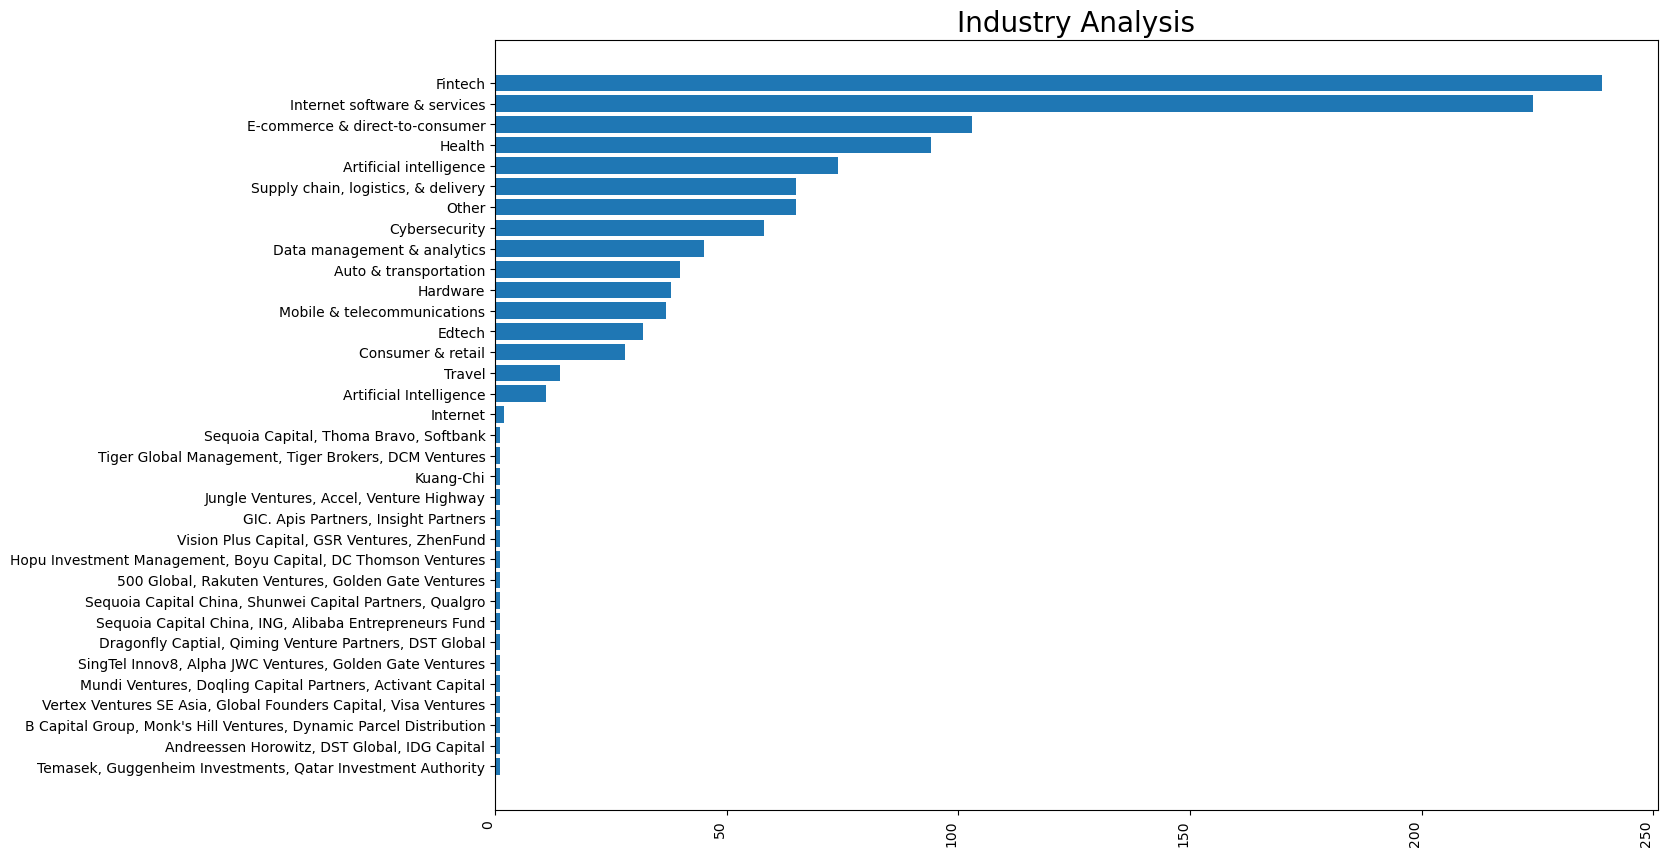

In [90]:
plt.figure(figsize=(15,10))
plt.title('Industry Analysis', fontsize=20)
industry = df_unicorns.sort_values
plt.barh(industries.sort_values().index,industries.sort_values())
plt.xticks(rotation=90, ha='right')
plt.show()

In [91]:
# Ranking in percentage of the Countries that generate the most unicorn companies
countries = df_unicorns['Country'].value_counts()
countries10 = countries.head(10)
countries10

United States     636
China             174
India              70
United Kingdom     46
Germany            29
France             24
Israel             22
Canada             19
Brazil             17
South Korea        17
Name: Country, dtype: int64

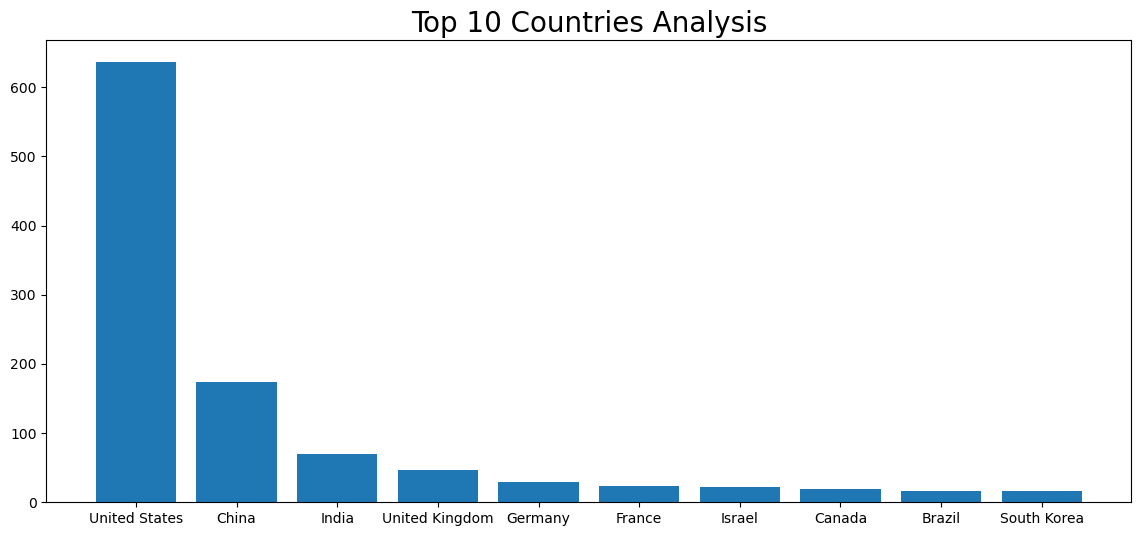

In [92]:
plt.figure(figsize=(14,6))
plt.title('Top 10 Countries Analysis', fontsize=20)
plt.bar(countries10.index,countries10)
plt.show()

In [93]:
# Convert column Date Joined to date
df_unicorns['Date Joined'] = pd.to_datetime(df_unicorns['Date Joined'])
df_unicorns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         1186 non-null   object        
 1   Valuation ($B)  1186 non-null   object        
 2   Date Joined     1186 non-null   datetime64[ns]
 3   Country         1186 non-null   object        
 4   City            1186 non-null   object        
 5   Industry        1186 non-null   object        
 6   Investors       1168 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 65.0+ KB


In [94]:
# Extract year and month
df_unicorns['Month'] = pd.DatetimeIndex(df_unicorns['Date Joined']).month
df_unicorns['Year'] = pd.DatetimeIndex(df_unicorns['Date Joined']).year

df_unicorns.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Month,Year
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [95]:
# Number of unicorn companies that have emerged over the years
company_year = df_unicorns.groupby(by=['Year']).count()['Company'].reset_index()
company_year

,Year,Company
0,2007,1
1,2011,2
2,2012,4
3,2013,3
4,2014,12
5,2015,34
6,2016,21
7,2017,44
8,2018,98
9,2019,102


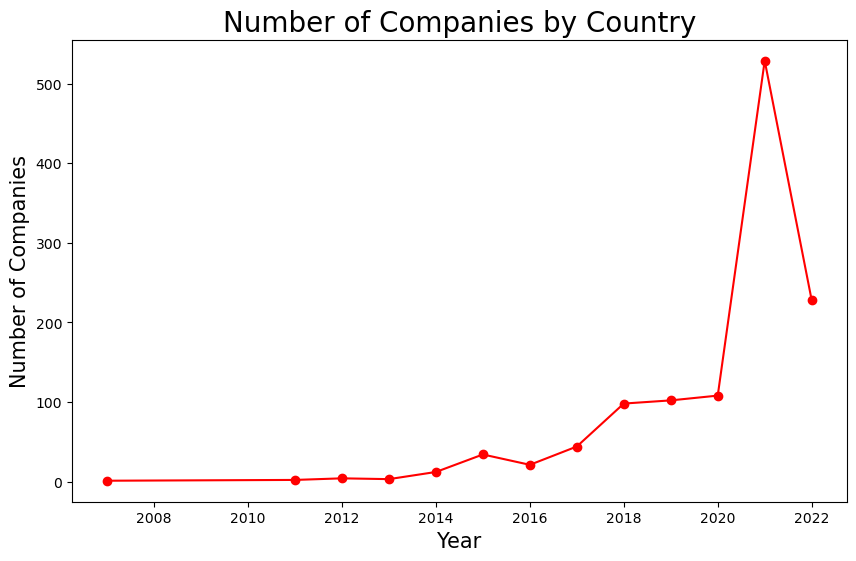

In [96]:
plt.figure(figsize=(10,6))
plt.title('Number of Companies by Country', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Companies', fontsize=15)
plt.plot(company_year['Year'], company_year['Company'], color='r', marker='o')
plt.show()

In [97]:
# Startups that emerged in 2021 separated by their respective industry sector
unicorns2021 = df_unicorns.loc[df_unicorns['Year'] == 2021]
unicorns2021_group = unicorns2021.groupby('Industry').count()['Company'].sort_values(ascending=False).reset_index()

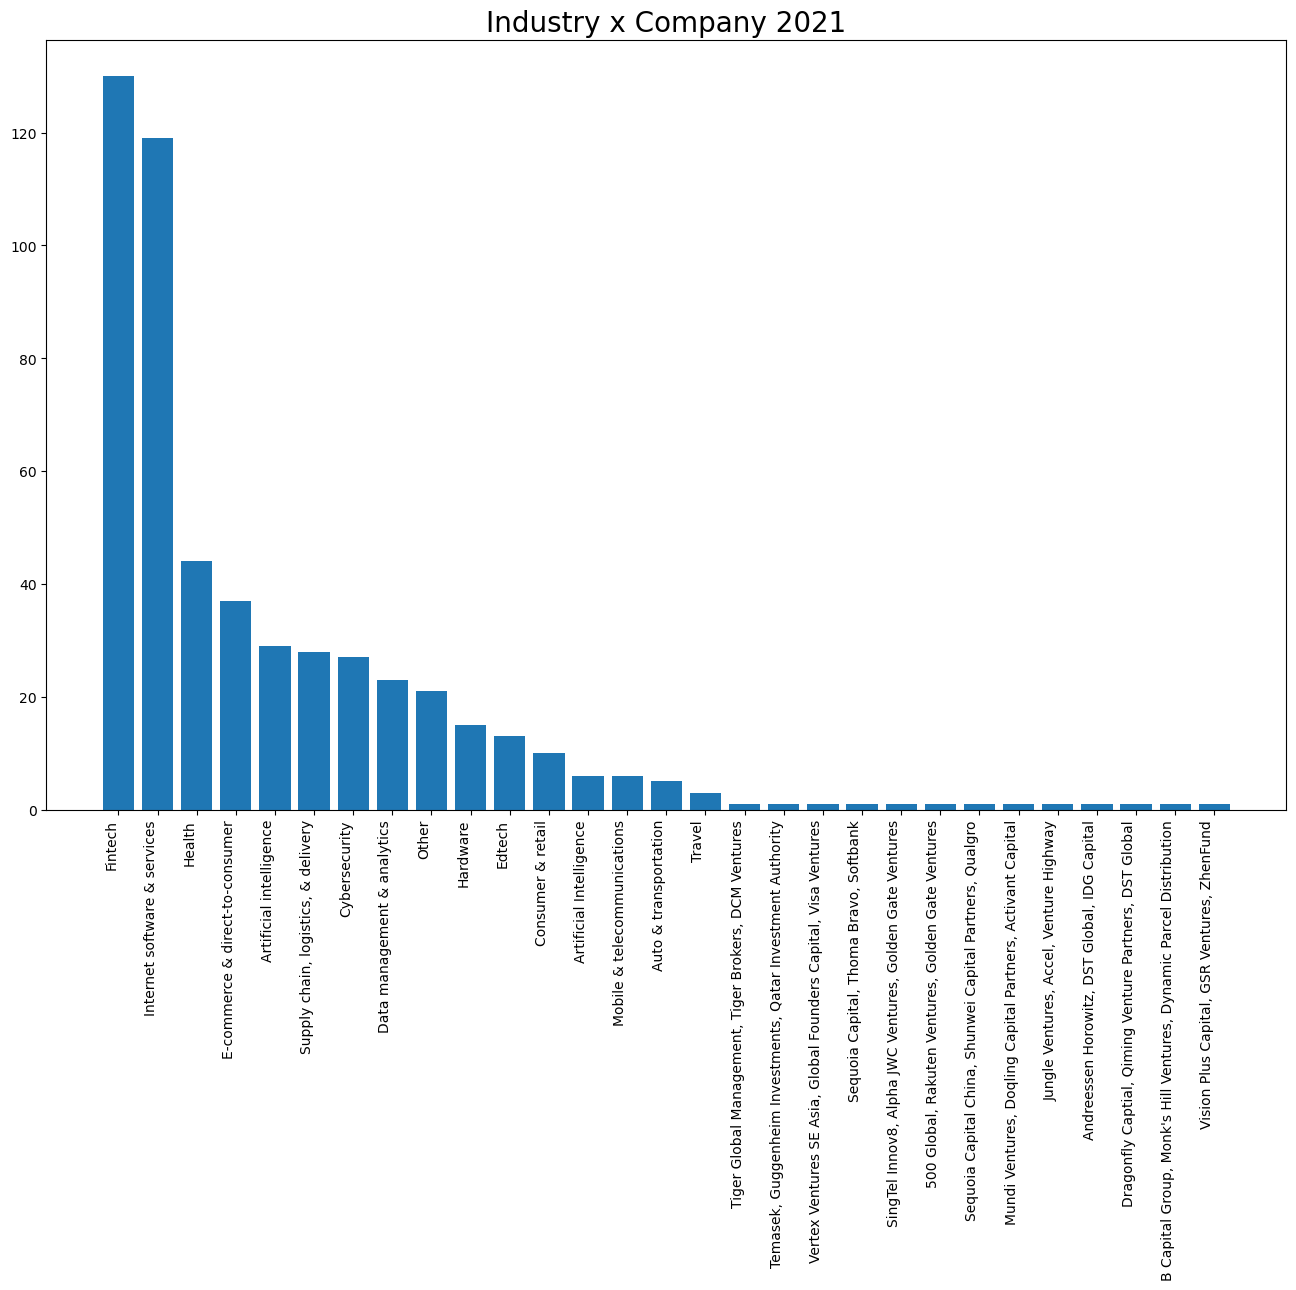

In [104]:
plt.figure(figsize=(16,10))
plt.title('Industry x Company 2021', fontsize=20)
plt.bar(unicorns2021_group['Industry'], unicorns2021_group['Company'])
plt.xticks(rotation=90, ha='right')
plt.show()

In [99]:
# Convert column Valuation to float
df_unicorns['Valuation ($B)'] = pd.to_numeric(df_unicorns['Valuation ($B)'].apply(lambda Linha: Linha.replace('$', '')))
df_unicorns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         1186 non-null   object        
 1   Valuation ($B)  1186 non-null   float64       
 2   Date Joined     1186 non-null   datetime64[ns]
 3   Country         1186 non-null   object        
 4   City            1186 non-null   object        
 5   Industry        1186 non-null   object        
 6   Investors       1168 non-null   object        
 7   Month           1186 non-null   int64         
 8   Year            1186 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 83.5+ KB


In [100]:
# Sum of the Valuation column by country
country_valuation = df_unicorns.groupby(by = ['Country']).sum()['Valuation ($B)'].sort_values(ascending=False).reset_index()
country_valuation

,Country,Valuation ($B)
0,United States,2069.89
1,China,678.59
2,United Kingdom,205.45
3,India,202.92
4,Germany,80.88
5,France,58.42
6,Australia,54.40
7,Canada,49.23
8,Israel,48.02
9,Brazil,40.08


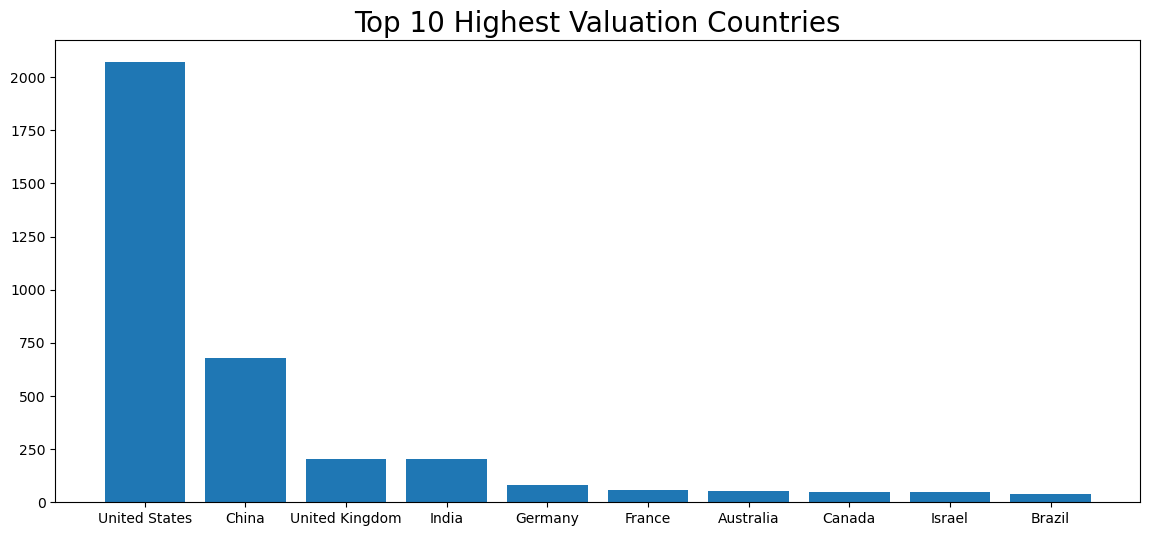

In [101]:
plt.figure(figsize=(14,6))
plt.title('Top 10 Highest Valuation Countries', fontsize=20)
plt.bar(country_valuation['Country'].head(10), country_valuation['Valuation ($B)'].head(10))
plt.show()

In [102]:
# Sum of the Valuation column by Year
year_valuation = df_unicorns.groupby(by = ['Year']).sum()['Valuation ($B)'].reset_index()
year_valuation

,Year,Valuation ($B)
0,2007,1.38
1,2011,12.40
2,2012,158.00
3,2013,10.00
4,2014,160.80
5,2015,91.85
6,2016,80.17
7,2017,282.45
8,2018,575.46
9,2019,456.26


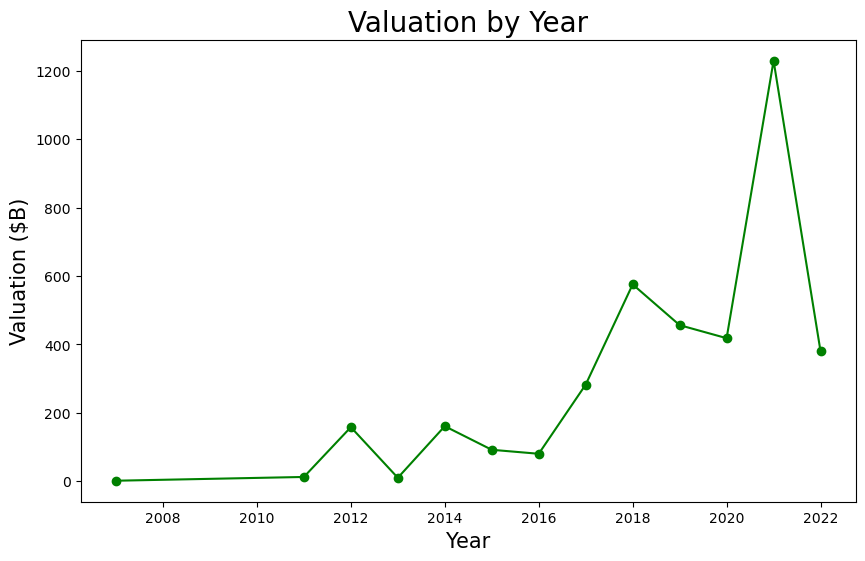

In [103]:
plt.figure(figsize=(10,6))
plt.title('Valuation by Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Valuation ($B)', fontsize=15)
plt.plot(year_valuation['Year'], year_valuation['Valuation ($B)'], color='g', marker='o')
plt.show()